In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = 0
p = 1

def prob(q):
    return np.exp(-0.5*q*q) / np.sqrt(2 * np.pi)

def dprob(q):
    return - q * np.exp(-0.5*q*q) / np.sqrt(2 * np.pi)

def U(q):
    return 0.5 *q * q + 0.5*np.log(2*np.pi)

def dU(q):
    return q

def timestep_euler(q,p,eps,m):
    q_new = q + eps*p/m
    p_new = p - eps*dU(q)
    return q_new, p_new

def timestep_euler_mod(q,p,eps,m):
    p_new = p - eps*dU(q)
    q_new = q + eps*p_new/m
    return q_new, p_new

def timestep_leapfrog(q,p,eps,m):
    p_new = p - eps*dU(q)/2
    q_new = q + eps*p_new/m
    p_new = p_new - eps*dU(q_new)/2
    return q_new, p_new
    

In [3]:
q_next = q
p_next = p
eps = 0.3
qs, ps = [], []
for i in range(20):
    qs.append(q_next)
    ps.append(p_next)
    q_next, p_next = timestep_leapfrog(q_next,p_next,eps,1)

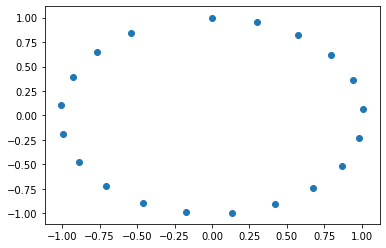

In [4]:
plt.scatter(qs,ps)

# Hamiltonian MC

In [42]:
def HMC_init(d):
#     return np.zeros(d), np.ones(d)
    return np.array([-1.5,-1.55]), np.array([-1,1])

def U(q,cov):
    return 0.5 * q @ (np.linalg.pinv(cov) @ q)

def dU(q,cov):
    return np.linalg.pinv(cov) @ q

def K(p,m=1):
    return np.sum(p*p/m)/2

def timestep_leapfrog(q,p,cov,eps,m):
    p_new = p - eps*dU(q,cov)/2
    q_new = q + eps*p_new/m
    p_new = p_new - eps*dU(q_new,cov)/2
    return q_new, p_new

def HMC_Proposal(q_curr,cov,L,eps):
    d = len(q_curr)
    p_curr = np.random.multivariate_normal(np.zeros(d), np.eye(d))
    q_new, p_new = q_curr, p_curr
    for i in range(L):
        q_new, p_new = timestep_leapfrog(q_new,p_new,cov,eps,1)
    p_new = - p_new
    return q_new, p_new

def HMC_Proposal_Neal(q,cov,L,eps):
    d = len(q)
    p = np.random.multivariate_normal(np.zeros(d), np.eye(d))
    p = p - eps*dU(q,cov)/2
    for i in range(L):
        q = q + eps*p/1
        if i != L-1:
            p = p - eps*dU(q,cov)
    p = p - eps*dU(q,cov)/2
    p = - p
    return q, p


def HMC_Acceptance(q_curr,p_curr,q_new,p_new, cov):
    prob = np.exp(U(q_curr, cov) + K(p_curr) - U(q_new, cov) - K(p_new))
    return prob

In [43]:
def HamiltonMC(proposal_func, init_func, d, acceptance_func, cov, num_iters=1000, L=30, eps=0.15):
    """
    Runs the metropolis-hastings algorithm for
    num_iters iterations, using proposal_func
    to generate samples and scorer to assign
    probability scores to samples.

    proposal_func -- function that proposes
    candidate state; takes in current state as
    argument and returns candidate state
    init_func -- function that proposes starting
    state; takes no arguments and returns a
    sample state
    score_func -- function that calculates f(y)/f(x)
    * g(y,x)/g(x,y); takes in two state samples
    (the current sample x then the candidate y).

    Returns a sequence of every step-th sample. You
    should only sample on upon acceptance of a new
    proposal. Do not keep sampling the current state.

    Note the total number of samples will NOT be
    equal to num_iters. num_iters is the total number
    of proposals we generate.
    """
    # TODO
    qs,ps = [], []
    q, p = init_func(d)
    for i in range(num_iters):
        q_new, p_new = proposal_func(q, cov, L, eps)
        if np.random.uniform() < acceptance_func(p, q, q_new, p_new, cov):
            qs.append(q), ps.append(p)
            q, p = q_new, p_new
    return qs, ps
#     return samples

In [44]:
cov = np.array([[1,0.95],[0.95,1]])
cov

array([[1.  , 0.95],
       [0.95, 1.  ]])

In [48]:
qs, ps = HamiltonMC(HMC_Proposal_Neal, HMC_init, 2, HMC_Acceptance, cov, 25, 25, 0.25)

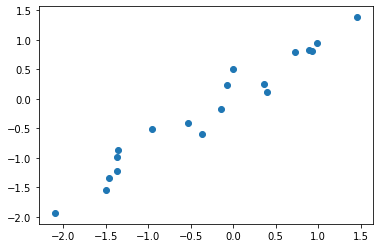

In [49]:
qs, ps = np.array(qs), np.array(ps)
plt.scatter(qs[:,0],qs[:,1])

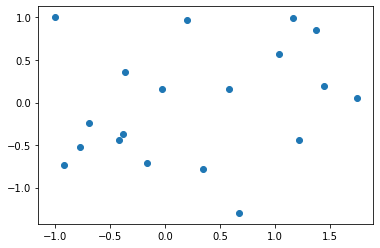

In [50]:
plt.scatter(ps[:,0],ps[:,1])

# Gas Implementation (MH version)

U_old: 141.60829463374884
U_new: 115.88515865405465
dE: -25.72313597969419
1.0895271410865819
U_old: 141.60829463374884
U_new: 161.67944663585158
dE: 20.071152002102735
0.9352851340246763
U_old: 141.60829463374884
U_new: 137.14151936796472
dE: -4.466775265784122
1.0150006479682863
U_old: 141.60829463374884
U_new: 138.15098634073863
dE: -3.4573082930102146
1.0115910222547568
U_old: 141.60829463374884
U_new: 142.4090811688213
dE: 0.8007865350724614
0.9973342709324631
U_old: 141.60829463374884
U_new: 142.15548599529134
dE: 0.5471913615425024
0.9981776912194451
U_old: 141.60829463374884
U_new: 144.61091788617506
dE: 3.0026232524262184
0.9900411766182563
U_old: 141.60829463374884
U_new: 141.98717408844774
dE: 0.37887945469890383
0.9987378656467212
U_old: 141.60829463374884
U_new: 160.13619736530163
dE: 18.527902731552786
0.940108790564403
U_old: 141.60829463374884
U_new: 151.07994338970187
dE: 9.471648755953026
0.9689210341475317
U_old: 141.60829463374884
U_new: 142.18488649381467
dE: 0.576

/Users/moo/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


U_old: 141.60829463374884
U_new: 150.99421724973573
dE: 9.385922615986885
0.9691979465773353
U_old: 141.60829463374884
U_new: 129.0993114378253
dE: -12.508983195923548
1.0425781236677545
U_old: 141.60829463374884
U_new: 142.43807286165273
dE: 0.829778227903887
0.997237894226634
U_old: 141.60829463374884
U_new: 126.34790331072534
dE: -15.260391323023498
1.0521839653961387
U_old: 141.60829463374884
U_new: 180.6565790596699
dE: 39.048284425921054
0.8779541145138826
U_old: 141.60829463374884
U_new: 121.88947227629248
dE: -19.71882235745636
1.0679377025149646
U_old: 141.60829463374884
U_new: 145.57998708648046
dE: 3.9716924527316166
0.986848274928084


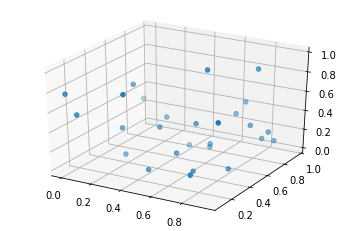

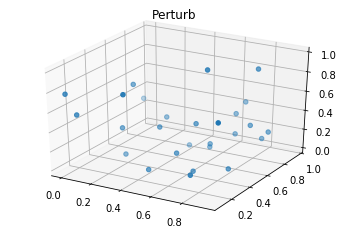

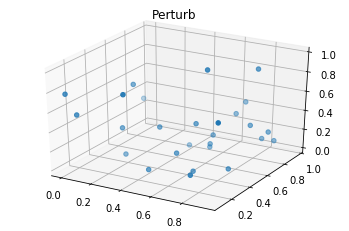

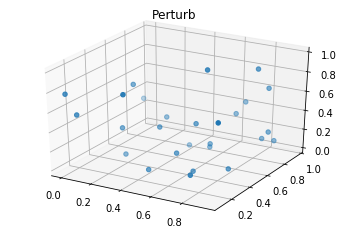

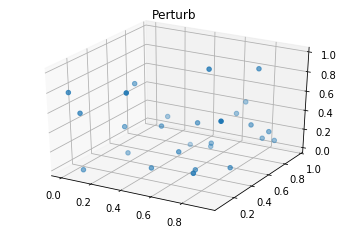

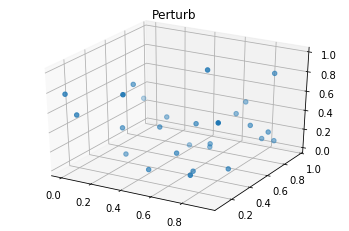

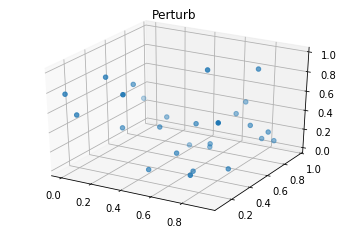

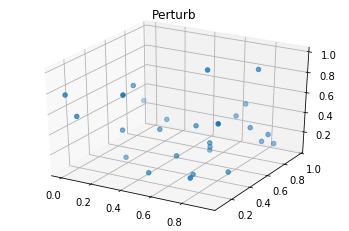

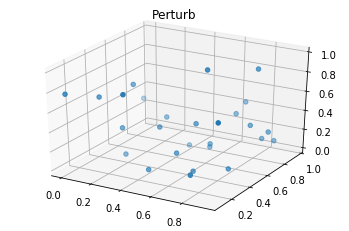

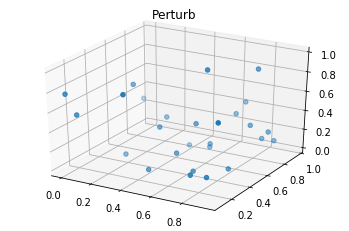

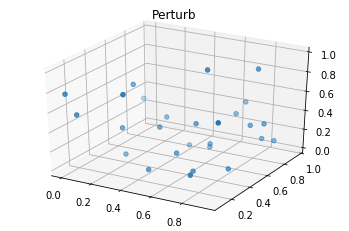

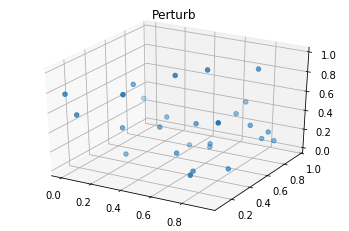

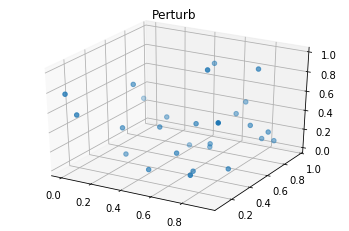

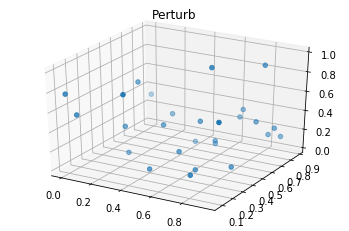

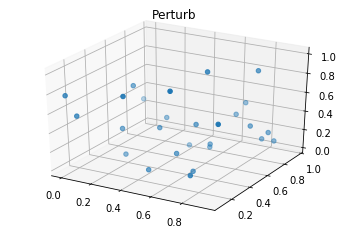

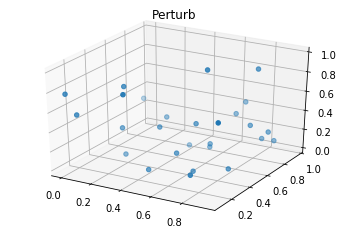

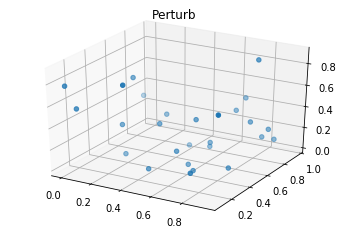

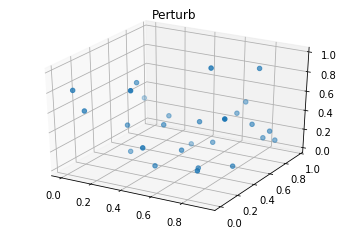

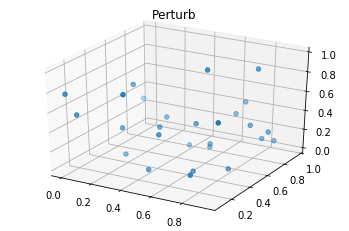

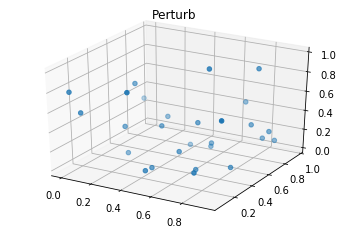

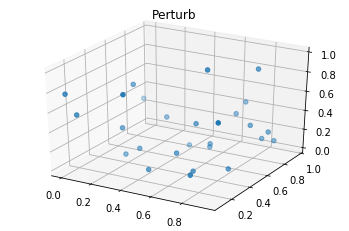

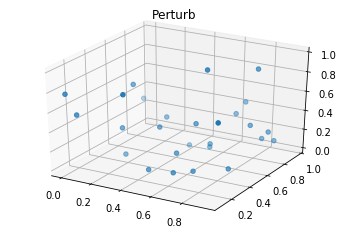

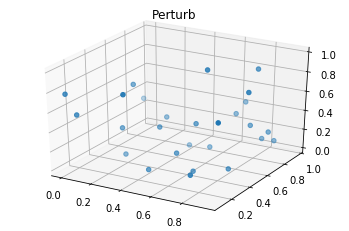

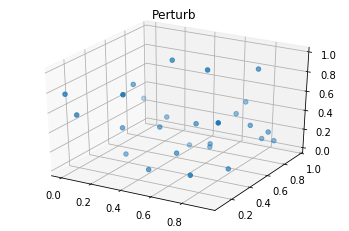

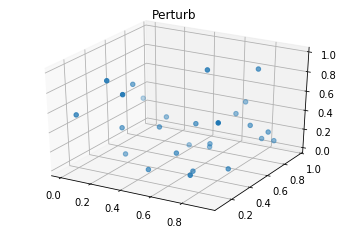

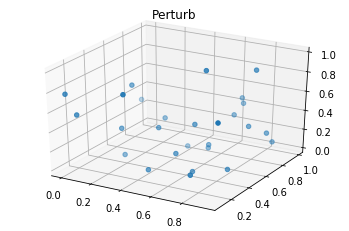

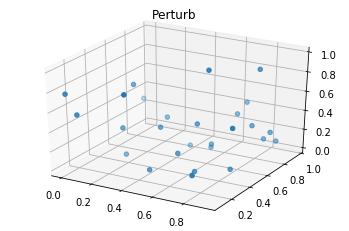

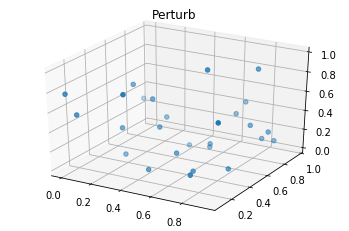

In [99]:
import numpy as np
import scipy.constants as const
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# mesh/array (3d)

k = const.k
# Make init velocities determined by temp
T = 300 #Kelvin
N = 3 # number of particles along a certain axis

def init_pos(N):
    #X = np.random.uniform(low=0, high=1, size=N)#np.linspace(0, (N-1)/(2*N), num=N)
    #Y = np.random.uniform(low=0, high=1, size=N)#np.linspace(0, (N-1)/(2*N), num=N)
    #Z = np.random.uniform(low=0, high=1, size=N)#np.linspace(0, (N-1)/(2*N), num=N)
    #Xg, Yg, Zg = np.random.uniform(low=0, high=1, size=(N,N,N))#np.meshgrid(X, Y, Z)
    Xg = np.random.uniform(low=0, high=1, size=(N,N,N))
    Yg = np.random.uniform(low=0, high=1, size=(N,N,N))
    Zg = np.random.uniform(low=0, high=1, size=(N,N,N))
    return (Xg, Yg, Zg)

ps = init_pos(N)

fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.scatter(*ps, marker='o');

def find_nearest(point_index, positions):
    # positions: tuple of grids
    assert point_index < N**3
    xx, yy, zz = positions
    tuple_index = np.unravel_index(point_index, xx.shape)
    point_x = xx[tuple_index]
    point_y = yy[tuple_index]
    point_z = zz[tuple_index]
    deltaX = periodic_distance_difference(point_x, xx)
    deltaY = periodic_distance_difference(point_y, yy)
    deltaZ = periodic_distance_difference(point_z, zz)
    dist = np.square(deltaX)
    dist = dist + np.square(deltaY)
    dist = dist + np.square(deltaZ)
    # Since a point itself will have the smallest (0 distance), we take the second of the smallest points
    dist[tuple_index] = 100
    closest_index = np.argmin(dist)
    closest_distance = np.sqrt(dist[np.unravel_index(closest_index,xx.shape)])
    return (closest_index, closest_distance)

def periodic_distance_difference(coordinate, coordinate_grid):
    # Returns a mesh-grid like output of the periodic minimum delta
    delta = np.abs(coordinate_grid - coordinate * np.ones_like(coordinate_grid))
    return np.minimum(np.ones_like(delta)-delta, delta)

#Test code for find nearest and peridic distance
#print("periodic test\n", periodic_distance_difference(0.3, ps[0]))
# ps[0][1, 0, 0] = 0.3
# for i in range(N**3):
#     tup = np.unravel_index(i, ps[0].shape)
#     print(i, f'X: {ps[0][tup]}', f'Y: {ps[1][tup]}', f'Z: {ps[2][tup]}')
# print("Find nearest test:\n", find_nearest(4, ps))

# proposal step size distance
alpha = 1/N
# Lennard jones potential constants
eps = 0.997 # kJ/mol
sigma = 0.2 # Angstroms normalized to box width (10000) angstroms

# Implement Matteo's proposal method:
# Move first particle, compute potential, accept/reject
# Move second particle, as if first particle hasn't moved, accept/reject
# ... All particles move indepenently of each other

# Implement a proposal method that uses the previous accepted state (path traversal in trajectory space)


def compute_potential(positions):
    xx, yy, zz = positions # positions in unit
    potential_sum = 0
    for i in range(N**3):
        closest_index, d_small = find_nearest(i, positions)
        #print(d_small)
        # instead of multiplying by 4, multiply by 2 to account for halfing from double counting
        #potential_sum = potential_sum + 2*eps*((sigma/d_small)**12 - (sigma/d_small)**6)
        potential_sum = potential_sum + 0.1/d_small**2
    return potential_sum

# Reason about how this should run ???
def propose(positions):
    xx, yy, zz = positions
    propositions = []
    for i in range(N**3):
        xx_new = positions[0].copy()
        yy_new = positions[1].copy()
        zz_new = positions[2].copy()
        proposed_positions = (xx_new, yy_new, zz_new)
        #peturb = alpha * np.random.randn(3)
        peturb = alpha * np.random.uniform(low=-1, high=1, size=3)
        tuple_index = np.unravel_index(i, xx.shape)
        # Forgot to do limiting based on periodicity
        xx_new[tuple_index] = (xx_new[tuple_index] + peturb[0]) % 1
        yy_new[tuple_index] = (yy_new[tuple_index] + peturb[1]) % 1
        zz_new[tuple_index] = (zz_new[tuple_index] + peturb[2]) % 1
        U_old = compute_potential(positions)
        print(f'U_old: {U_old}')
        U_new = compute_potential(proposed_positions)
        print(f'U_new: {U_new}')
        dE = U_new - U_old
        print(f'dE: {dE}')
        energy_delta = np.exp(-dE/T)
        print(energy_delta)
        if np.random.uniform() < min(energy_delta, 1):#/k/T), 1):
            fig = plt.figure();
            ax = fig.add_subplot(111, projection='3d');
            ax.scatter(*proposed_positions, marker='o');
            ax.set_title('Perturb')
            propositions.append(proposed_positions) # accept/move
        else:
            fig = plt.figure();
            ax = fig.add_subplot(111, projection='3d');
            ax.scatter(*positions, marker='o');
            ax.set_title('Stay')
            propositions.append(positions) # add current state to list again
    return propositions
    
propose(ps);